In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


## Decision Tree Example:

Here we would like to show an example how decision tree works. Let's consider a company is trying to hire a new employee and would like to determine the position and salary based on the candidate's background.

[0, 1, 0, 1]

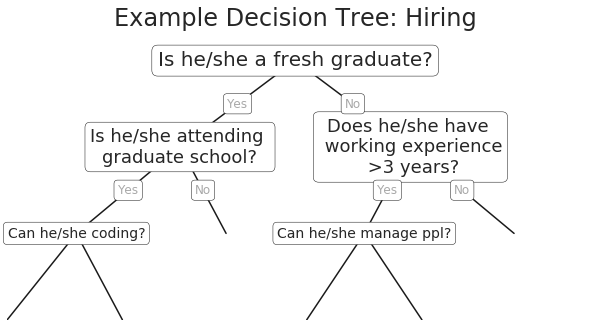

In [2]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Example Decision Tree: Hiring', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "Is he/she a fresh graduate?", 20)
text(ax, 0.3, 0.6, "Is he/she attending \ngraduate school?", 18)
text(ax, 0.7, 0.6, "Does he/she have \n working experience\n >3 years?", 18)
text(ax, 0.12, 0.3, "Can he/she coding?", 14)
# text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
text(ax, 0.62, 0.3, "Can he/she manage ppl?", 14)
text(ax, 0.88, 0.3, "", 14)

text(ax, 0.4, 0.75, "Yes", 12, alpha=0.4)
text(ax, 0.6, 0.75, "No", 12, alpha=0.4)

text(ax, 0.21, 0.45, "Yes", 12, alpha=0.4)
text(ax, 0.34, 0.45, "No", 12, alpha=0.4)

text(ax, 0.66, 0.45, "Yes", 12, alpha=0.4)
text(ax, 0.79, 0.45, "No", 12, alpha=0.4)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '-k')
# ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '-k')
ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '-k')
# ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
ax.axis([0, 1, 0, 1])


### Still use Iris data as example

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

iris = load_iris()
X = iris.data[:, 2:] # x1: petal length, x2: petal width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

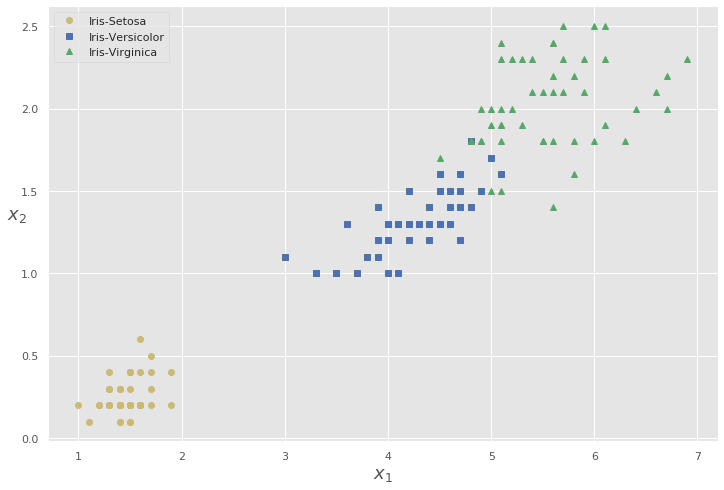

In [4]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
ax.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
ax.legend();

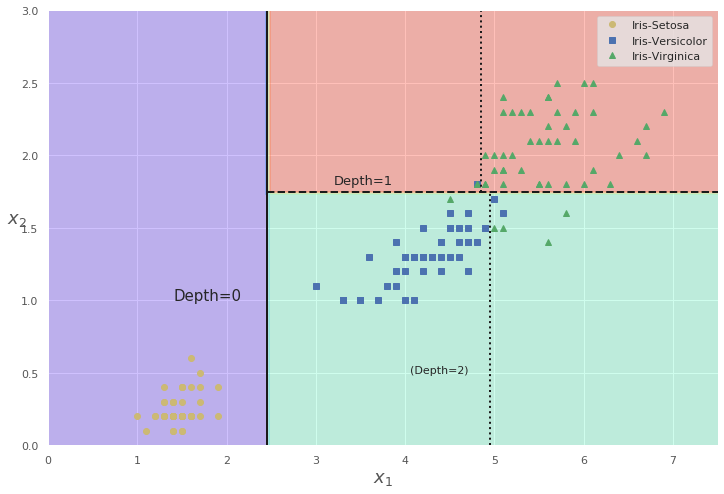

In [5]:
def plot_iris_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    fig = plt.figure(figsize=(12,8))
    ax = plt.axes()
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap='rainbow') ## color the areas based on prediction
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    ax.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    ax.set_xlabel(r"$x_1$", fontsize=18)
    ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
    ax.legend()



plot_iris_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### How to build a Decision Tree?

1. **Information Entropy** is a common algorithm for measuring the impurity of the sample dataset

2. **Gini impurity** 
    $$G_i = 1 - \sum_{k=1}^{n}p_{i,k}^2$$
    Where $p_{i,k}$ is the ratio of class k instances among the training instances in the i-th node
    - pure: Gini=0

## CART Algorithm
**CART** Algorithm, a.k.a Classification And Regression Tree algorithm is applied by Scikit-Learn to train Decision Trees. CART starts by picking a single feature k and a corresponding threshold $t_k$, which pair $(k, t_k)$ produces the purest subsets. 

- CART produces only *binary trees*

- Cost Function
$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_right}{m}G_{right}$$
Is simply the weighted average of the subsets' Gini impurity. Once it has splitted the dataset into two, it will split the subsets based on the same loss function and logic.


- So obviously it is a recursive algorithm, what's the end point of the algo?
    1. It reaches the maximum depth, which is defined by hyper-parameter *max_depth*.
    2. It can no longer reduce the impurity if keep doing further splits.


- CART is also a greedy algorithm, for each step, it looks at the current optimal split, and consecutively combined those optimal splits together. But it never checks if that's the global optimum or not. So the CART can lead us to pretty good results, but not always the best based on the Gini measure. However it has been proved that, the problem of finding a global optimal decision tree is a NP-Complete problem, and requires $O(exp(m))$ time.

- Algorithm Complexity: for prediction, we just need to traverse through the tree, from the top to bottom. Since decision trees are roughly balanced, the depth of the tree is about $O(log(m))$, **independent of the number of features**.
 Training the algorithm needs complexity of $O(n\times mlog(m))$

### Entropy:
$$H_i = - \sum_{k=1; p_{i,k}\neq 0}^{n} p_{i,k}log(p_{i,k})$$
Where $i$ is the node of the decision tree, n is the total number of targets.
- For most cases, either Gini impurity or Information entropy will lead to similar result.
- Empirically, Gini impurity is slightly faster to compute, so it can be a good default.

### Another exmaple for createing a decision tree in Sklearn

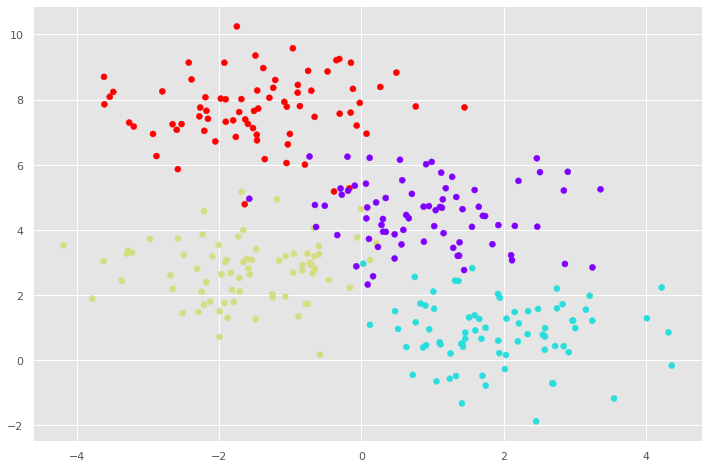

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

fig = plt.figure(figsize = (12,8))
ax = plt.axes()
ax.scatter(X[:,0], X[:,1], c=y, cmap='rainbow');

In [7]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3]):
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    fig = plt.figure(figsize=(12,8))
    ax = plt.axes()
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap='rainbow')
    unique_y = np.unique(y)
    style_list = ['yo', 'ro', 'bs', 'g^', 'k*', 'r>']
    for i in range(len(unique_y)):
        ax.plot(X[:, 0][y==unique_y[i]], X[:, 1][y==unique_y[i]], style_list[i])
   
    ax.set_xlabel(r"$x_1$", fontsize=18)
    ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
    ax.axis(axes)


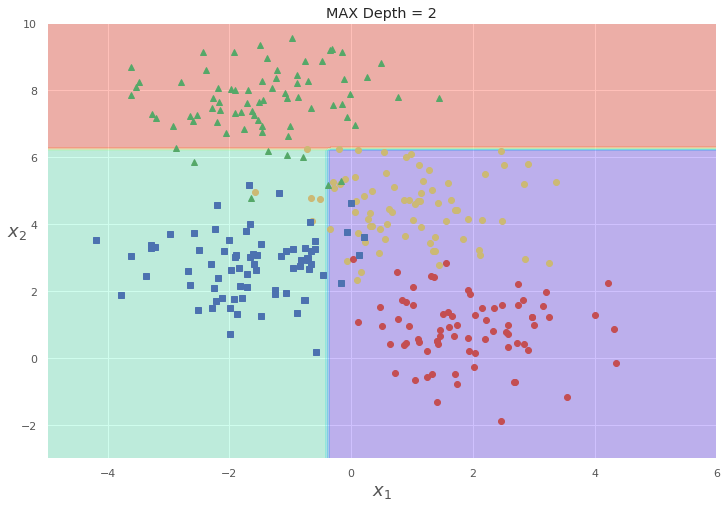

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree_depth2 = DecisionTreeClassifier(max_depth=2).fit(X, y)
plot_decision_boundary(tree_depth2, X, y,[-5,6,-3,10])
plt.title('MAX Depth = 2');

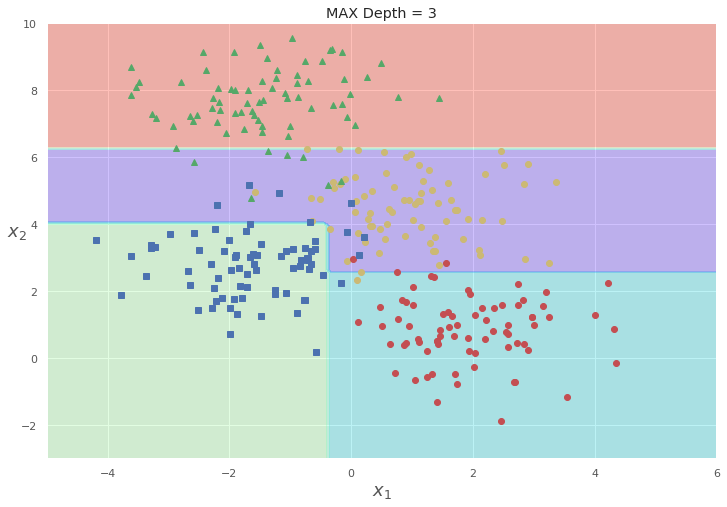

In [9]:
tree_depth3 = DecisionTreeClassifier(max_depth=3).fit(X, y)
plot_decision_boundary(tree_depth3, X, y,[-5,6,-3,10])
plt.title('MAX Depth = 3');

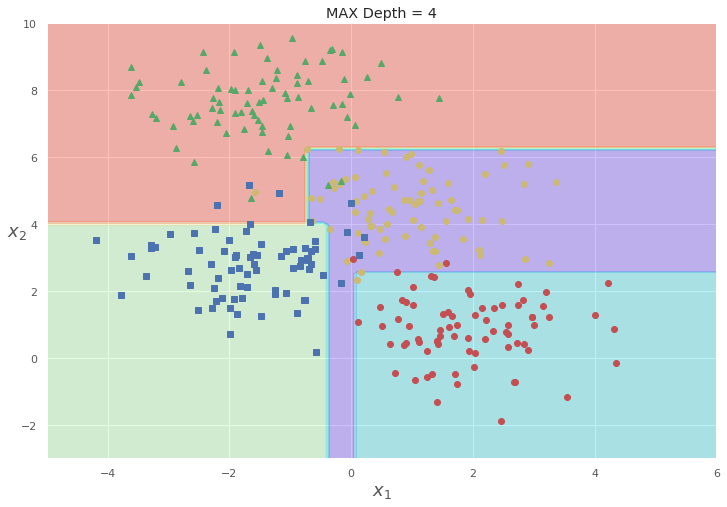

In [10]:
tree_depth4 = DecisionTreeClassifier(max_depth=4).fit(X, y)
plot_decision_boundary(tree_depth4, X, y,[-5,6,-3,10])
plt.title('MAX Depth = 4');

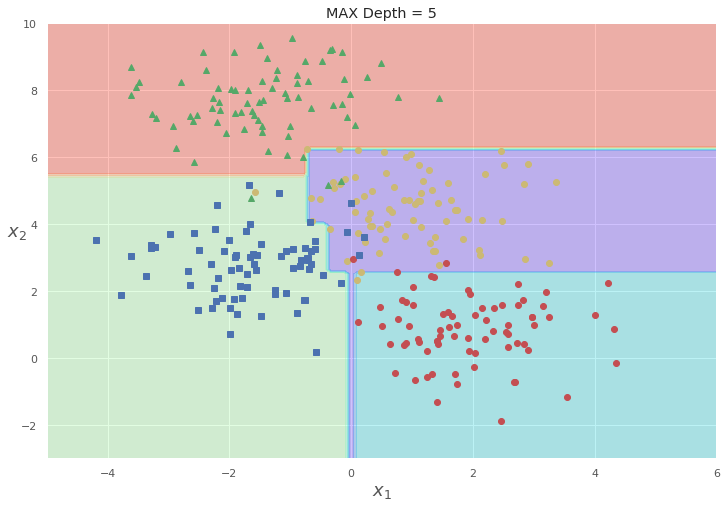

In [11]:
tree_depth5 = DecisionTreeClassifier(max_depth=5).fit(X, y)
plot_decision_boundary(tree_depth5, X, y,[-5,6,-3,10])
plt.title('MAX Depth = 5');

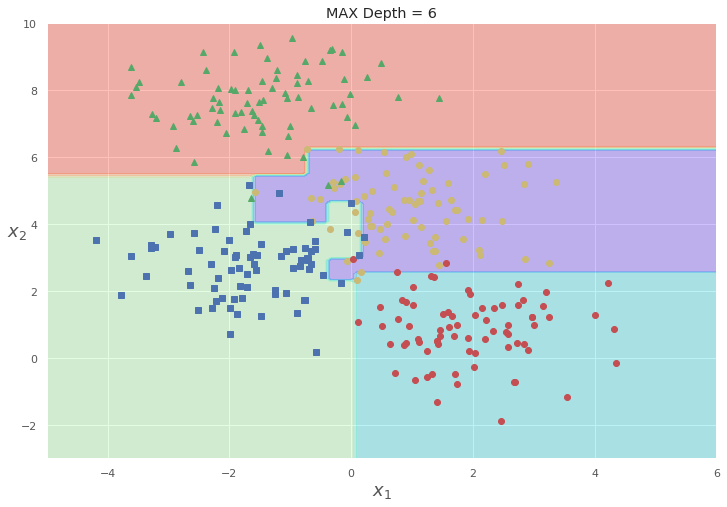

In [12]:
tree_depth6 = DecisionTreeClassifier(max_depth=6).fit(X, y)
plot_decision_boundary(tree_depth6, X, y,[-5,6,-3,10])
plt.title('MAX Depth = 6');

### Decision Tree is not sensitive to the data scale

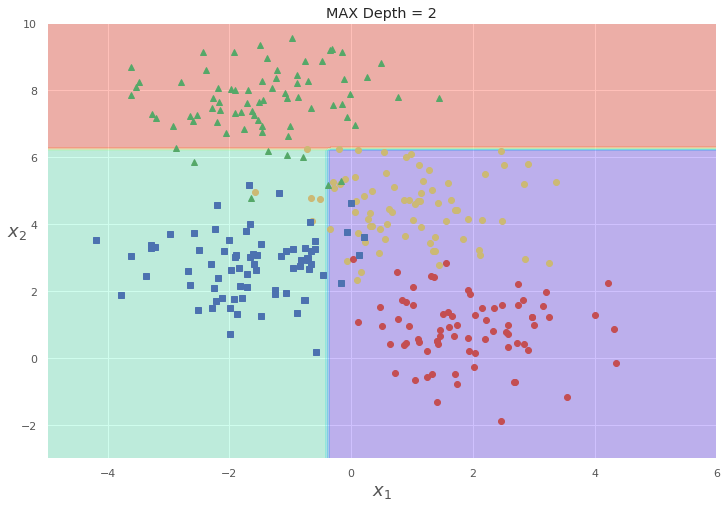

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree_depth2 = DecisionTreeClassifier(max_depth=2).fit(X, y)
plot_decision_boundary(tree_depth2, X, y,[-5,6,-3,10])
plt.title('MAX Depth = 2');

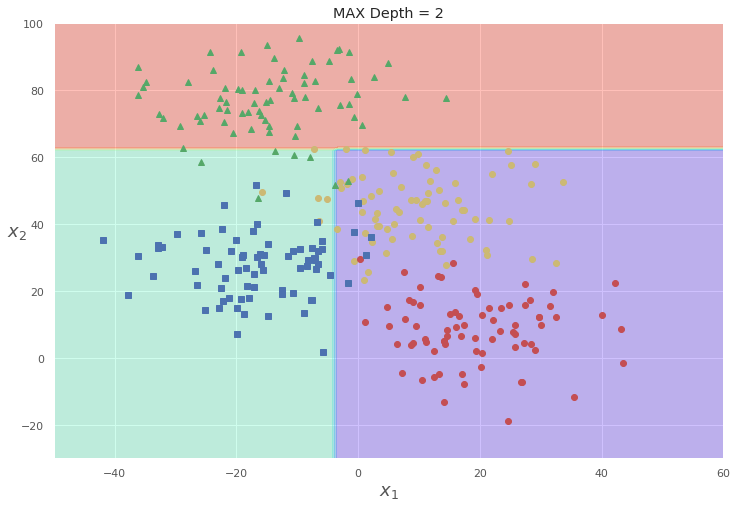

In [14]:
X = X*10
tree_depth22 = DecisionTreeClassifier(max_depth=2).fit(X, y)
plot_decision_boundary(tree_depth22, X, y,[-5*10,6*10,-3*10,10*10])
plt.title('MAX Depth = 2');

### Take aways:

- Decision Trees make few model assumption;

- Decision Trees is a nonparametric model (number of parameters is not determined prior to the training, and the model itself has lots of freedom). In contrast, a *parametric* model

- Decision Trees are not sensitive to scale.

### Have you noticed what's the shape of the decision boundary of a decision tree? 

Comparing to SVM, Logistic Regression

![](images/lr_example.png)

![](images/SVM_example.png)



![](images/softmax_regression_contour_plot.png)

## Decision tree regression

WDecision tree regression tends to overfit the model

We are now going to talk about the process of building a regression tree. Roughly speaking, there are two steps.
1. We divide the predictor space — that is, the set of possible values
for $X_1$, $X_2$, . . . , $X_p$ — into J distinct and non-overlapping regions,
$R_1$, $R_2$, . . . , $R_J$.
2. For every observation that falls into the region $R_j$, we make the same
prediction, which is simply the mean of the response values for the
training observations in $R_j$

For instance, suppose that in Step 1 we obtain two regions, $R_1$ and $R_2$, and that the response mean of the training observations in the first region is 10, while the response mean of the training observations in the second
region is 20. Then for a given observation $X = x$, if $x \in R_1$ we will predict a value of 10, and if $x \in R_2$ we will predict a value of 20.

So how do we construct such regions $R_1$, $R_2$, . . . , $R_J$? In theory the regions could be in any shape, however we would like to divide the predicator space into high-dimensional rectangles, or boxes in our decision tree regression model. 

The goal is to minimize such loss function $$\sum_{j=1}^J\sum_{i \in R_j}(y_i - \hat{y}_{R_j})^2$$

where $\hat{y}_{R_j}$ is the mean response for the training observations with in the $j$-th box. Still it's hard to do the global optimization, so we still do like in decision tree classification-- *top-down*. We split the space from top level to lower levels similarly as we did in decision tree classifier.

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
from sklearn.metrics import mean_squared_error
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [17]:
y_predictions = tree_reg.predict(X)
tree_mse = mean_squared_error(y, y_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [25]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

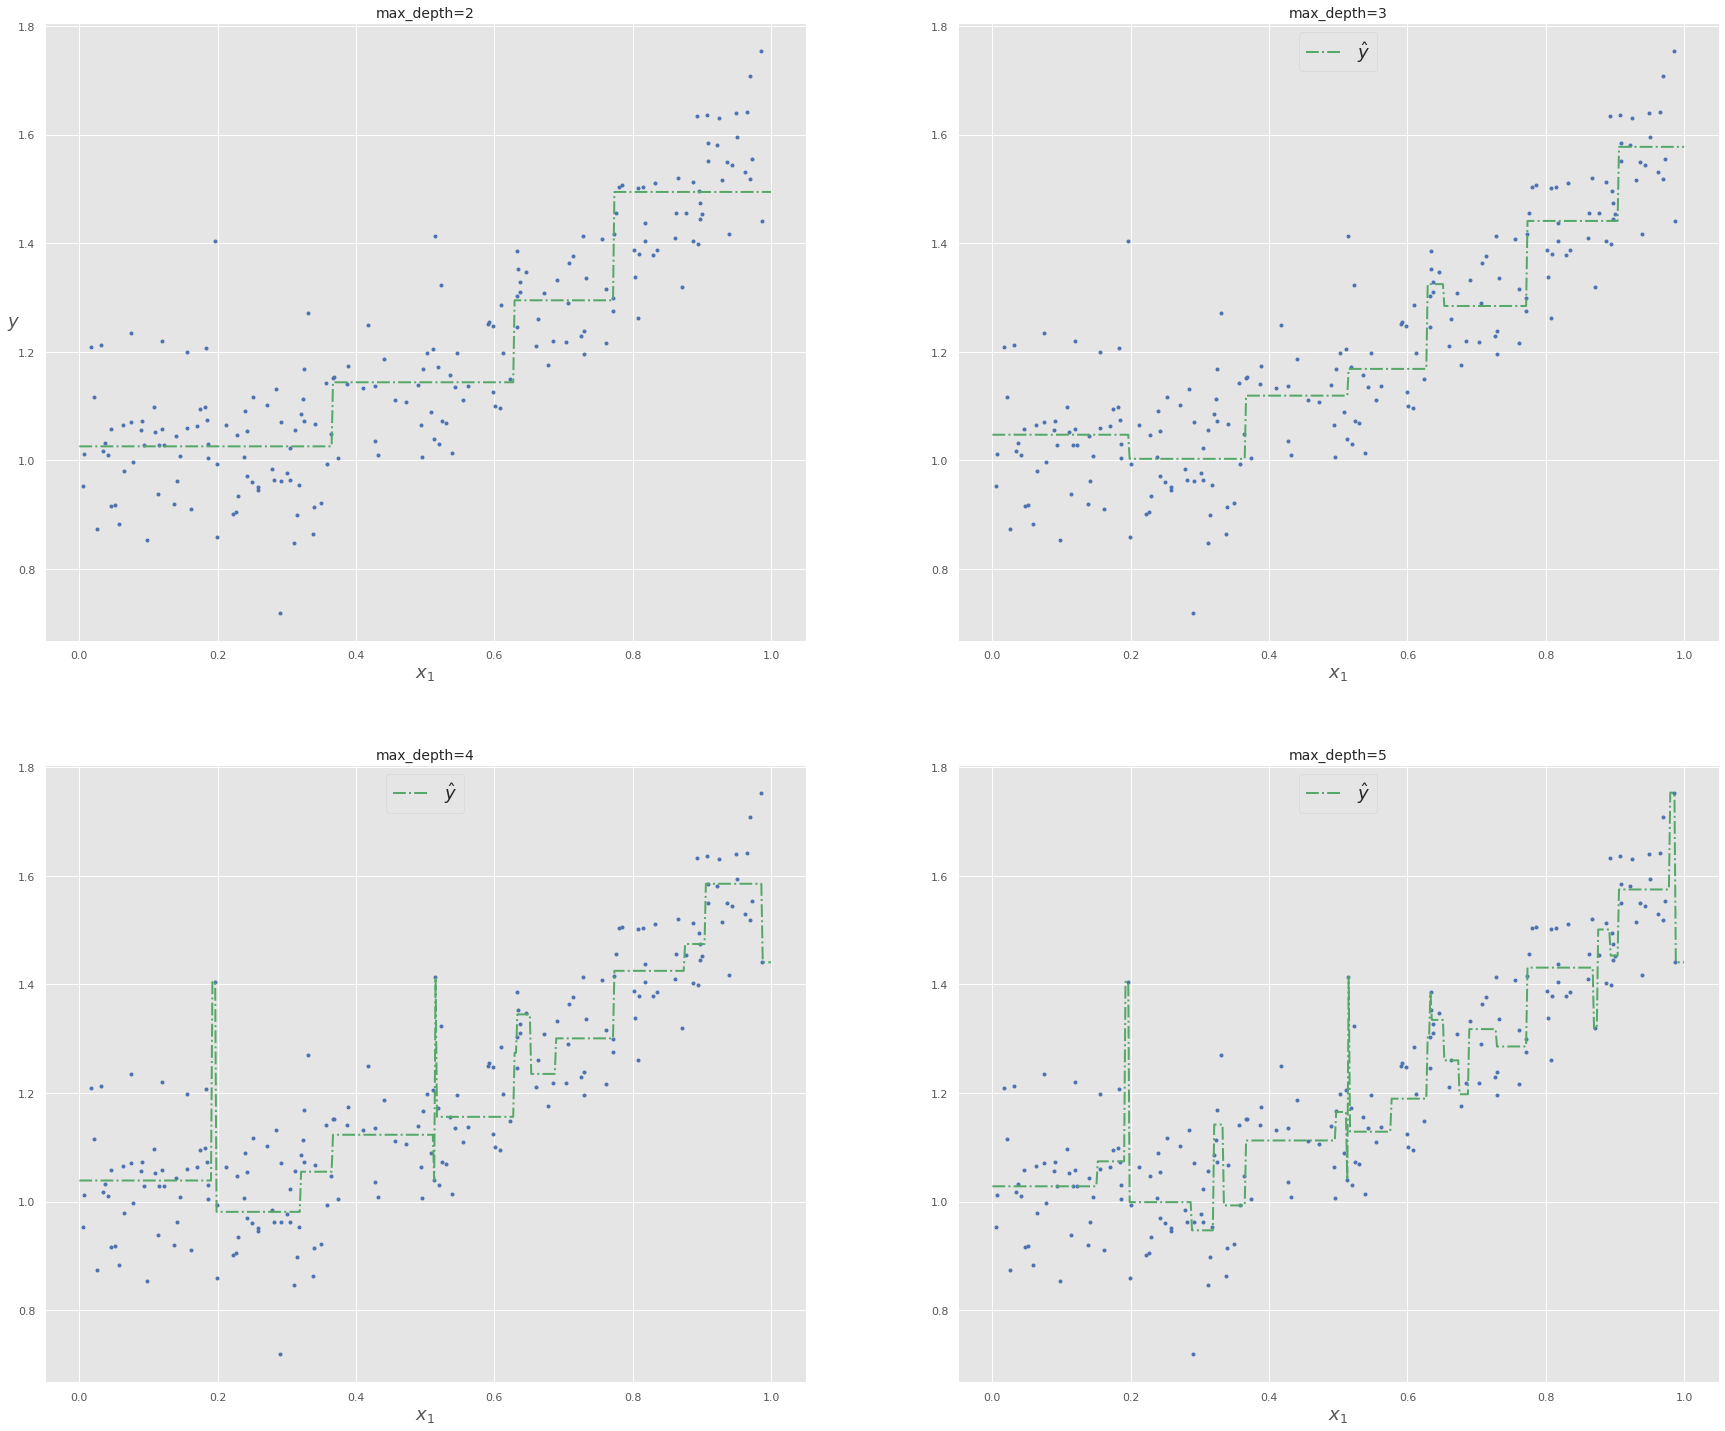

In [43]:


def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
#     plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "g-.", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(30, 25))

plt.subplot(221)
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg1.fit(X, y)
plot_regression_predictions(tree_reg1, X, y)

plt.title("max_depth=2", fontsize=14)

plt.subplot(222)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg2.fit(X, y)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=3", fontsize=14)

plt.subplot(223)
tree_reg3 = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_reg3.fit(X, y)
plot_regression_predictions(tree_reg3, X, y, ylabel=None)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=4", fontsize=14)


plt.subplot(224)
tree_reg3 = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_reg3.fit(X, y)
plot_regression_predictions(tree_reg3, X, y, ylabel=None)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=5", fontsize=14)


plt.show()

### If no restriction, decision tree regression will tend to do point-wise prediction

In [28]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = np.exp(0.5*X ** 2) + np.random.randn(m, 1) / 10

In [21]:
 ## un-regularized
tree_reg_unregularized = DecisionTreeRegressor(random_state=42)
## regularized with min sample leaf rather than depth of the tree
tree_reg_min10leaf = DecisionTreeRegressor(random_state=42, min_samples_leaf=10) 
tree_reg_unregularized.fit(X, y)
tree_reg_min10leaf.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred_ur = tree_reg_unregularized.predict(x1)
y_pred_r = tree_reg_min10leaf.predict(x1)


Text(0.5, 1.0, 'No restrictions')

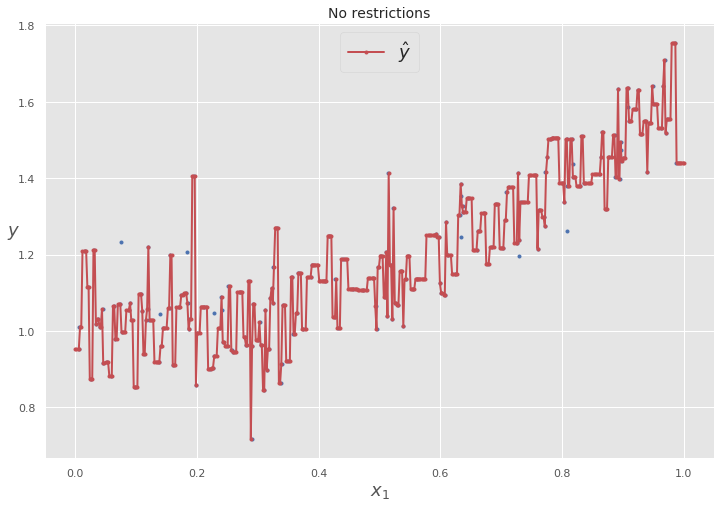

In [22]:

fig = plt.figure(figsize=(12,8))
ax = plt.axes()


ax.plot(X, y, "b.")
ax.plot(x1, y_pred_ur, "r.-", linewidth=2, label=r"$\hat{y}$")

ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18, rotation=0)
ax.legend(loc="upper center", fontsize=18)
ax.set_title("No restrictions", fontsize=14)


### Regularized decision tree regression shows piecewise prediction

Text(0.5, 1.0, 'min_samples_leaf=10')

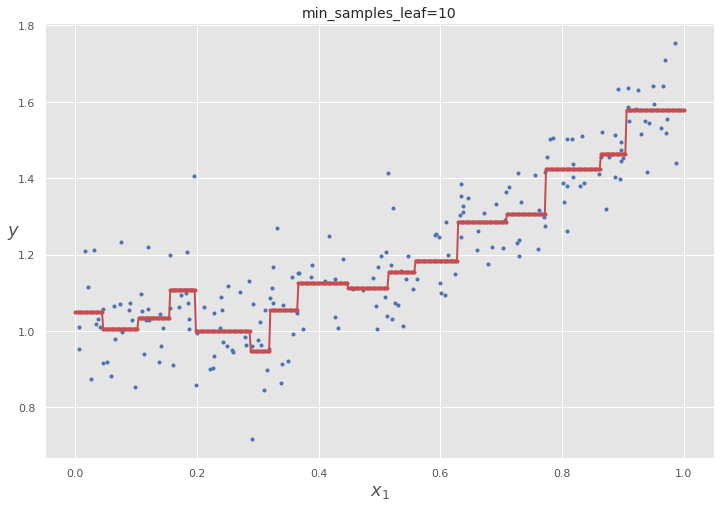

In [23]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.plot(X, y, "b.")
ax.plot(x1, y_pred_r, "r.-", linewidth=2, label=r"$\hat{y}$")
ax.set_ylabel("$y$", fontsize=18, rotation=0)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_title("min_samples_leaf={}".format(tree_reg_min10leaf.min_samples_leaf), fontsize=14)
